# Исследование данных

Задача классификации: по данным нужно определить, уйдет ли клиент или нет. Таргетный признак: Churn. Метрика: ROC-AUC.

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
'''train = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/train.csv')
test = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/test.csv')
submission_example = pd.read_csv('/kaggle/input/advanced-dls-spring-2021/submission.csv')'''

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

train.shape, test.shape

((5282, 20), (1761, 19))

In [ ]:
# разделяем признаки

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
train.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
150,16,20.6,330.25,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),0
954,71,106.8,7623.2,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Electronic check,0
2049,1,44.9,44.9,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
1214,24,76.1,1712.7,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
1307,32,75.5,2324.7,Female,0,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0


In [ ]:
test.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
366,48,95.50,4627.85,Female,0,No,Yes,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check
1518,32,99.55,3204.65,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
1602,4,70.20,280.35,Male,1,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
248,71,49.35,3515.25,Male,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Two year,No,Electronic check
124,13,75.30,989.45,Male,0,Yes,No,Yes,Yes,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Mailed check


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Видим, что численный признак TotalSpent имеет тип значений object, хотя по природе является числом. А категориальный признак IsSeniorCitizen наоборот - численный. Исправим это:

In [ ]:
train.TotalSpent = train.TotalSpent.replace(' ', '0').astype('float')
train.IsSeniorCitizen = train.IsSeniorCitizen.replace({0: 'No', 1: 'Yes'})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   object 
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Теперь всё то же самое для test'овых данных

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

In [ ]:
test.TotalSpent = test.TotalSpent.replace(' ', '0').astype('float')
test.IsSeniorCitizen = test.IsSeniorCitizen.replace({0: 'No', 1: 'Yes'})
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   float64
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   object 
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

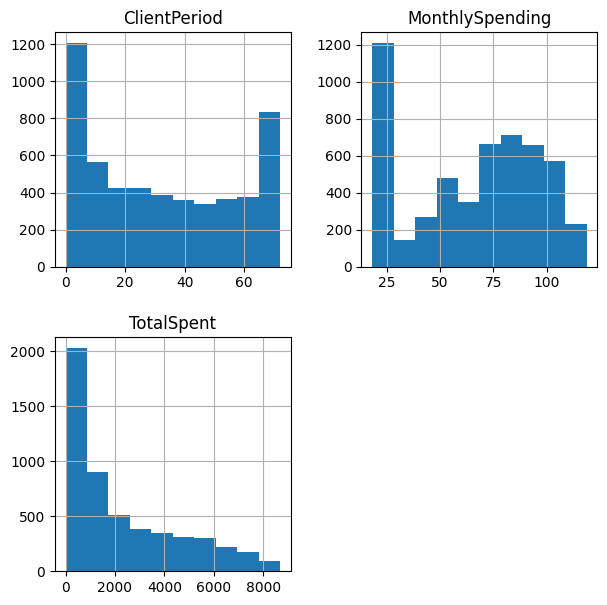

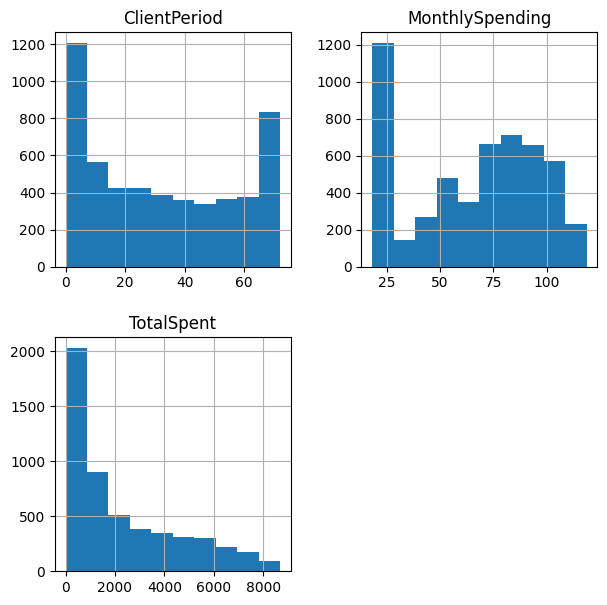

In [ ]:
train[num_cols].hist(figsize=(7, 7))
train[num_cols].hist(figsize=(7, 7))

Большая часть клиентов использовала сервис менее 10 дней, при этом после 65 дней использования, сервисом начинали пользоваться больше клиентов. Пссмотрим, как длительность пользования коррелирует с не/ушедшим впоследствии клиентом.

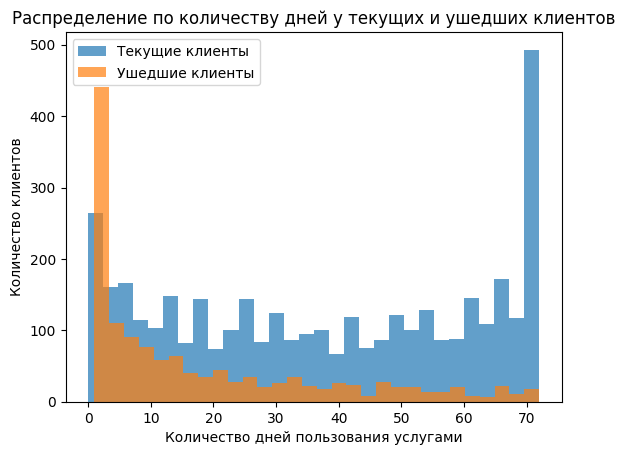

In [ ]:
train.groupby('Churn')['ClientPeriod'].plot(kind='hist', bins=30, alpha=0.7)
plt.legend(['Текущие клиенты', 'Ушедшие клиенты'])
plt.xlabel('Количество дней пользования услугами')
plt.ylabel('Количество клиентов')
plt.title('Распределение по количеству дней у текущих и ушедших клиентов')
plt.show()

Большинство клиентов уходят в первые дни пользования.

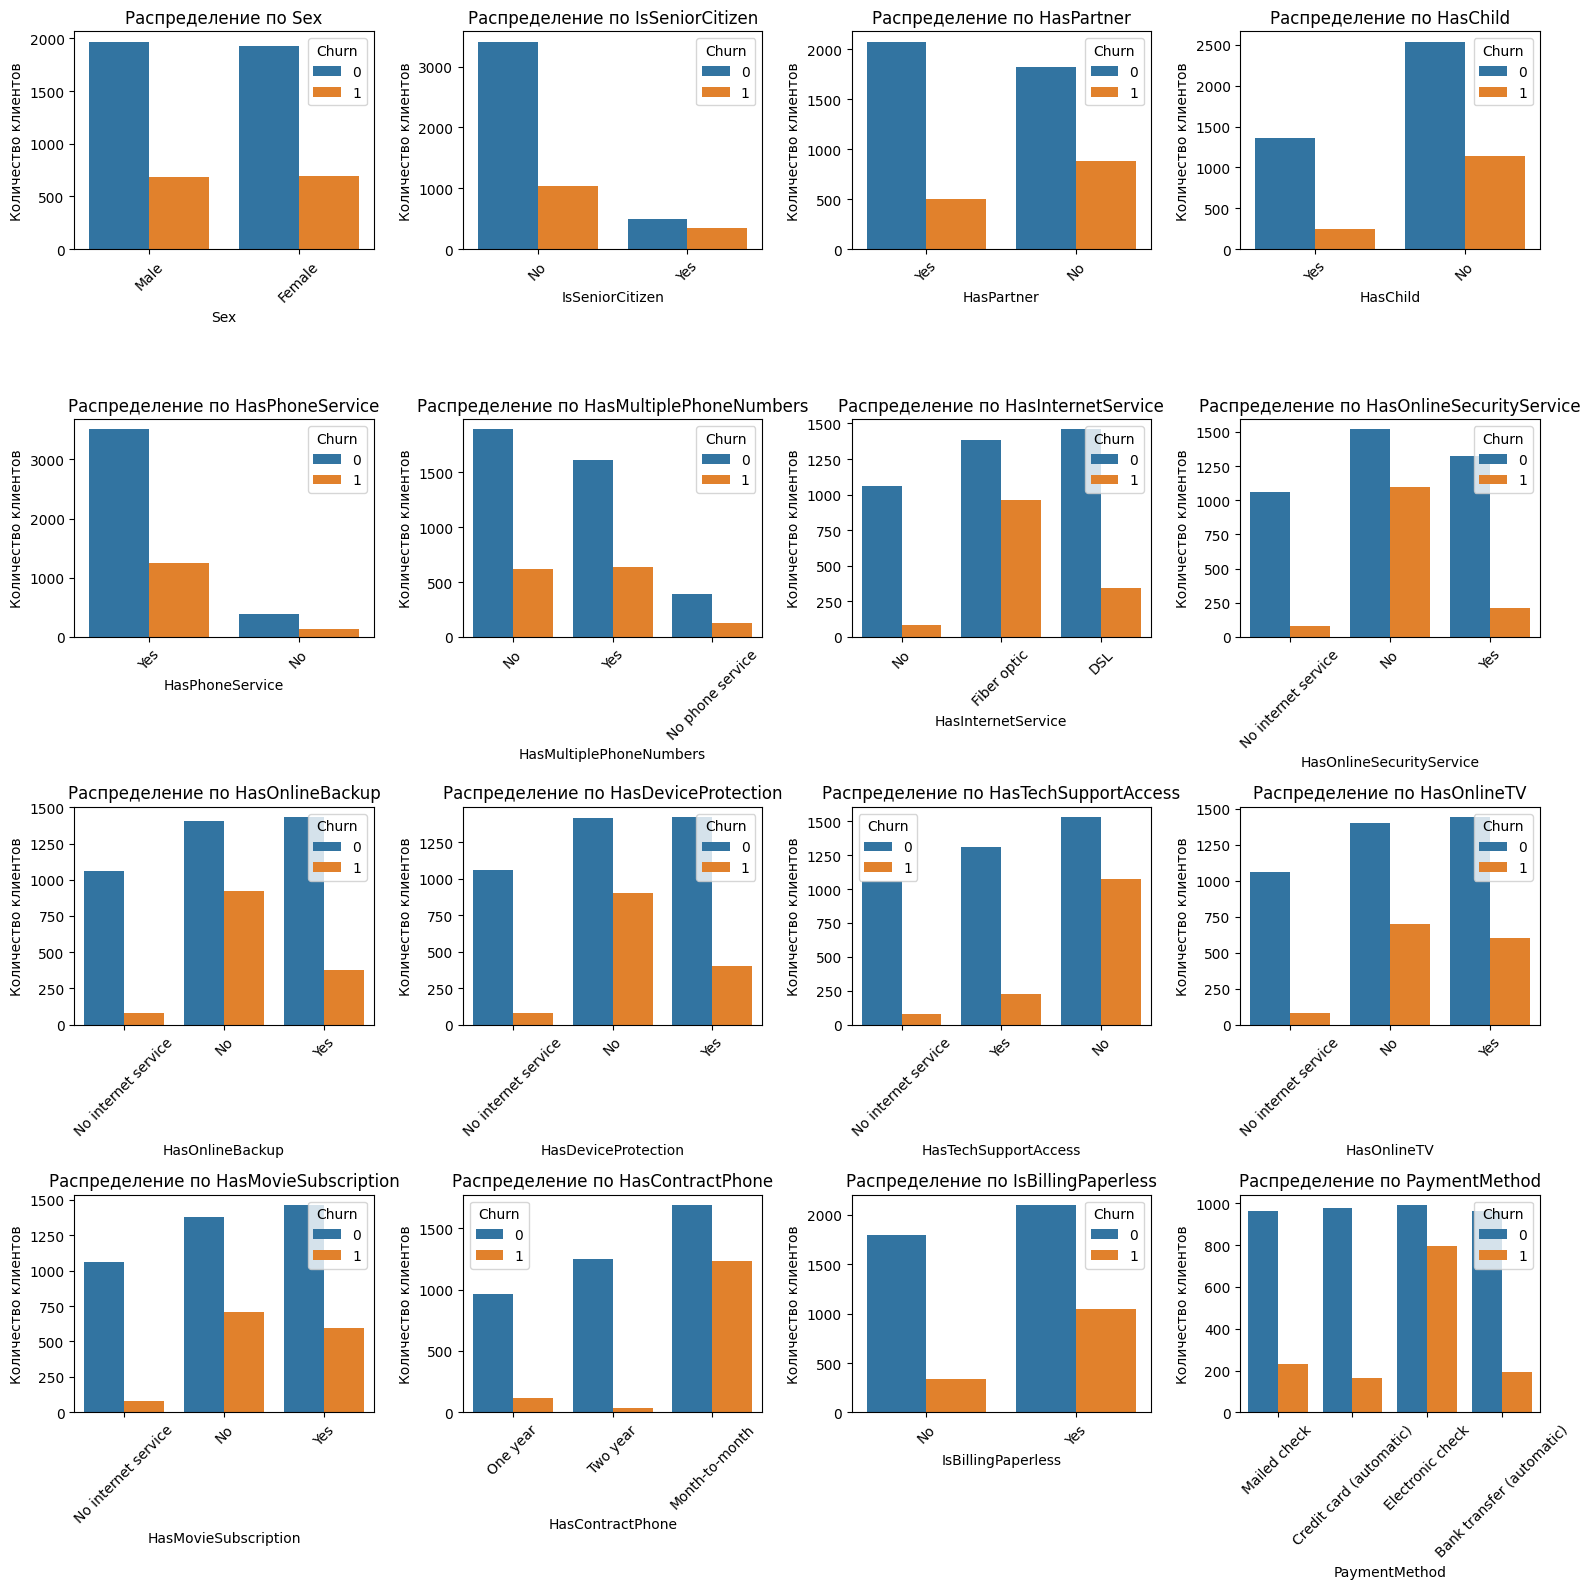

In [ ]:
# Создаем сетку для диаграмм
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, feature in enumerate(cat_cols):
    row = i // 4
    col = i % 4
    ax = axes[row, col]

    # Создаем столбчатую диаграмму для текущего категориального признака
    sns.countplot(x=feature, hue='Churn', data=train, ax=ax)

    ax.set_xlabel(feature)
    ax.set_ylabel('Количество клиентов')
    ax.set_title(f'Распределение по {feature}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

Выводы:
*   Ушедшие клиенты чаще имеют партнера и детей, чем текущие.
*   Среди ушедших клиентов были более востребованы (чем у текущих): Fiber Optic Internet, Online Security Service.
*   Ушедшие клиенты чаще всего заключали месячный контракт (а не годовой/двухгодовой).
* У ушедших клиентов чаще отсутствует услуга Online Backup и DeviceProtection.




In [ ]:
train.Churn.value_counts()

0    3898
1    1384
Name: Churn, dtype: int64

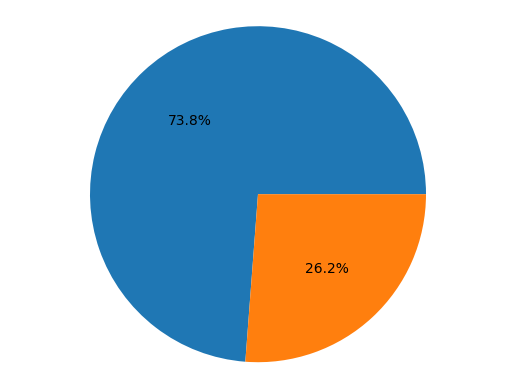

In [ ]:
plt.pie(train.Churn.value_counts(), autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Датасет несбалансирован. Ушедших клиентов почти в 3 раза меньше, чем оставшихся.

In [ ]:
!pip install phik
import phik

corr_data = train.phik_matrix()

interval columns not set, guessing: ['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'Churn']


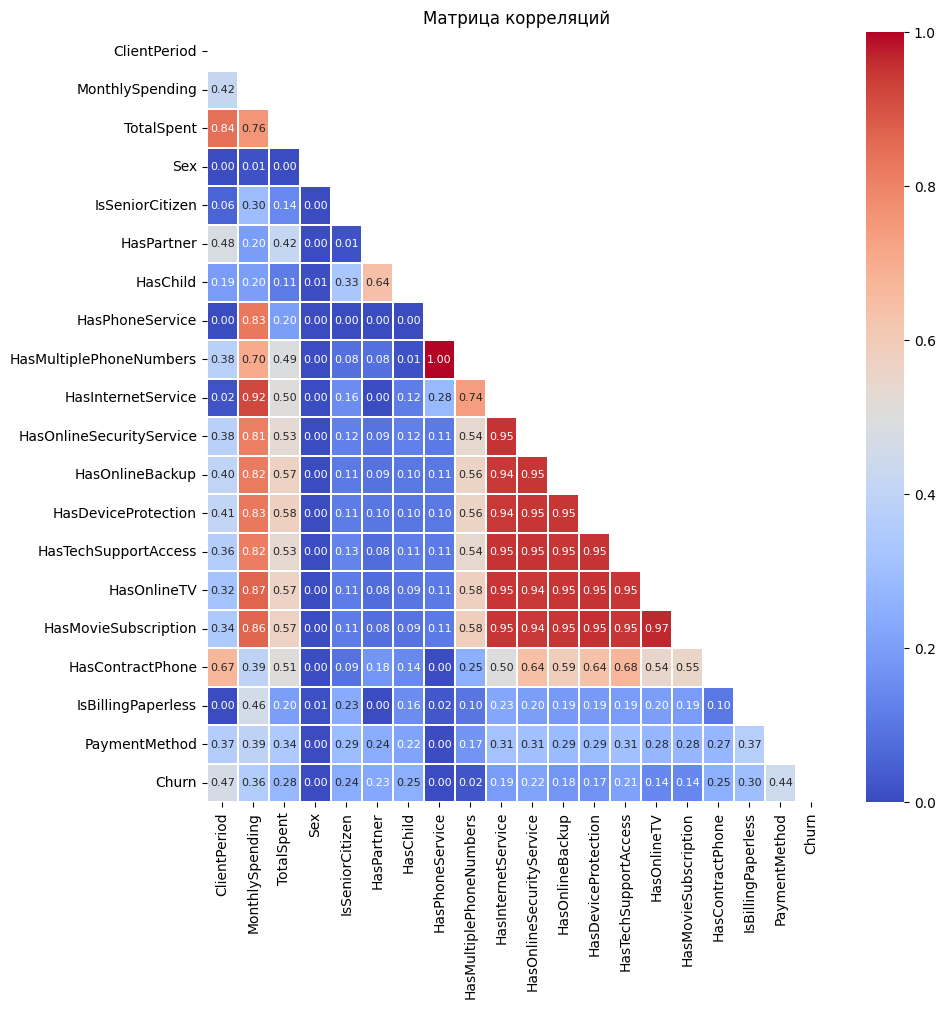

In [ ]:
plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8}, linewidths=0.2)

plt.title("Матрица корреляций")
plt.xticks(rotation=90)
plt.show()

Выводы:
* Все интернет-услуги очень сильно коррелируют между собой.
* Большая корреляция со всеми услугами у признака MonthlySpending. И это очевидно: ежемесячная выплата напрямую зависит от того, какие услуги у клиента подключены.
*ClientPeriod сильно коррелирует с TotalSpent, что тоже объяснимо: чем больше дней ты пользуешься услугами, тем больше у тебя общая сумма трат.

In [ ]:
# удалим признаки с услугами, сильно коррелирующие с MonthlySpending (более чем на 0.85)

data_clean = train.drop(['HasInternetService',
                        'HasOnlineTV',
                        'HasMovieSubscription'
                       ], axis=1)

test_clean = test.drop(['HasInternetService',
                        'HasOnlineTV',
                        'HasMovieSubscription'
                       ], axis=1)

## Подбор и обучение моделей



In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
features_train = train.drop('Churn', axis=1)
target_train = train.Churn

features_train_cl = data_clean.drop('Churn', axis=1)
target_train_cl = data_clean.Churn

print(features_train.shape)
print(target_train.shape)

(5282, 19)
(5282,)


In [ ]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]
cat_features = [
        'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
]

results = {}

### Логистическая регрессия

In [ ]:
# Pipeline для Логистической регрессии
cat_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first', handle_unknown='error')),
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features),
        ('num', num_transformer, num_cols),
    ])

# Определение финального Pipeline
regression_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', LogisticRegression())])

In [ ]:
param_grid = {'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
              'model__penalty': ['l1', 'l2'],
              'model__solver': ['liblinear', 'saga'],
              'model__max_iter': [100, 500, 1000]}

regression_cv = RandomizedSearchCV(regression_pipe,
                                   param_grid, cv=5,
                                   scoring='roc_auc', n_iter=15,
                                   random_state=321)

regression_cv.fit(features_train_cl, target_train_cl)

print(regression_cv.best_score_)

results['LogisticRegression'] = regression_cv.best_score_

0.844908899120034


### Случайный лес

In [ ]:
# результат без мультиколлинеарных признаков!!!!
# Pipeline для RandomForest

# кодируем категориальные признаки
cat_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
])

#масштабируем числовые признаки
num_transformer = Pipeline(steps=[
   ('scaler', StandardScaler()),
])

#объединяем Pipeline для предобработки
preprocessor = ColumnTransformer(
   transformers=[
       ('cat', cat_transformer, cat_cols),
       ('num', num_transformer, num_cols),
   ])

# Определение финального Pipeline
forest_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', RandomForestClassifier(random_state=321))])

In [ ]:
# Подбор гиперпараметров

forest_params = {
   'model__max_depth': range(1,10,1),
   'model__max_features': [None, "sqrt", "log2"],
   'model__n_estimators': [100, 150, 200],
   'model__min_samples_leaf': range(2,8,1),
   'model__min_samples_split': [3,5,10]
}

forest_cv = RandomizedSearchCV(forest_pipe, forest_params, cv=5, random_state=321,
                            scoring='roc_auc', n_iter=15, n_jobs=-1)

forest_cv.fit(features_train, target_train)

print(forest_cv.best_score_)
results['RandomForest'] = forest_cv.best_score_

0.8447685510447668


In [ ]:
# результат с мультиколлинеарными признаками !!!!
# объединяем Pipeline для предобработки
preprocessor = ColumnTransformer(
   transformers=[
       ('cat', cat_transformer, cat_features),
       ('num', num_transformer, num_cols),
   ])

# Определение финального Pipeline
forest_pipe_2 = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', RandomForestClassifier(random_state=321))])

forest_cv_2 = RandomizedSearchCV(forest_pipe_2, forest_params, cv=5, random_state=321,
                            scoring='roc_auc', n_iter=15, n_jobs=-1)

forest_cv_2.fit(features_train_cl, target_train_cl)

forest_cv_2.best_score_

0.842295721284265

### Catboost


In [ ]:
# Протестируем модель с гиперпараметрами по умолчанию

result = cross_val_score(CatBoostClassifier(cat_features=cat_cols,
                                verbose = 500),
                         features_train, target_train, scoring='roc_auc').mean()
print(result)
results['CatBoost Default'] = result

Learning rate set to 0.019062
0:	learn: 0.6807849	total: 66.3ms	remaining: 1m 6s
500:	learn: 0.3667031	total: 8.32s	remaining: 8.29s
999:	learn: 0.3246626	total: 18s	remaining: 0us
Learning rate set to 0.019062
0:	learn: 0.6800247	total: 15.1ms	remaining: 15.1s
500:	learn: 0.3659009	total: 5.96s	remaining: 5.93s
999:	learn: 0.3276399	total: 14.6s	remaining: 0us
Learning rate set to 0.019064
0:	learn: 0.6799678	total: 18ms	remaining: 18s
500:	learn: 0.3595565	total: 6.58s	remaining: 6.56s
999:	learn: 0.3195883	total: 15.3s	remaining: 0us
Learning rate set to 0.019064
0:	learn: 0.6808359	total: 16.4ms	remaining: 16.4s
500:	learn: 0.3675612	total: 8.36s	remaining: 8.32s
999:	learn: 0.3253514	total: 15.6s	remaining: 0us
Learning rate set to 0.019064
0:	learn: 0.6802295	total: 17.3ms	remaining: 17.3s
500:	learn: 0.3647709	total: 7.82s	remaining: 7.79s
999:	learn: 0.3243480	total: 15.1s	remaining: 0us
0.8435158963169526


In [ ]:
# Теперь воспользуемся RandomizedSearchCV

params = {
          'depth': [2, 3, 4, 5],
          'l2_leaf_reg': [0.1, 0.5, 1, 5, 10],
          'subsample': [0.5, 0.6, 1, 3, 5, 10],
          'n_estimators': [300, 500, 700, 1000],
          'learning_rate':[0.01, 0.05, 0.1, 0.3, 0.4] }

catboost_cv = RandomizedSearchCV(estimator=CatBoostClassifier(
                                cat_features=cat_cols,
                                eval_metric="AUC:hints=skip_train~false",
                                verbose = 500),
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 cv=5, n_iter=15, random_state=321)

catboost_cv.fit(features_train, target_train)

print(catboost_cv.best_score_)
results['CatBoost CV'] = catboost_cv.best_score_

0:	learn: 0.7408591	total: 8.64ms	remaining: 2.58s
299:	learn: 0.8631474	total: 2.75s	remaining: 0us
0:	learn: 0.7382516	total: 5.53ms	remaining: 1.65s
299:	learn: 0.8627645	total: 1.61s	remaining: 0us
0:	learn: 0.7055932	total: 5.59ms	remaining: 1.67s
299:	learn: 0.8679799	total: 1.49s	remaining: 0us
0:	learn: 0.7484653	total: 5.67ms	remaining: 1.7s
299:	learn: 0.8626371	total: 1.48s	remaining: 0us
0:	learn: 0.7485385	total: 5.67ms	remaining: 1.69s
299:	learn: 0.8655271	total: 1.67s	remaining: 0us
0:	learn: 0.7496845	total: 8.35ms	remaining: 2.5s
299:	learn: 0.8616062	total: 2.05s	remaining: 0us
0:	learn: 0.7464799	total: 7.27ms	remaining: 2.17s
299:	learn: 0.8641895	total: 2.96s	remaining: 0us
0:	learn: 0.7530303	total: 13.7ms	remaining: 4.11s
299:	learn: 0.8661692	total: 2.65s	remaining: 0us
0:	learn: 0.7543659	total: 7.57ms	remaining: 2.26s
299:	learn: 0.8629830	total: 2s	remaining: 0us
0:	learn: 0.7530937	total: 7.46ms	remaining: 2.23s
299:	learn: 0.8652831	total: 1.96s	remaining:

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5100, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2303, in _fit
    t

0:	learn: 0.7559267	total: 9.65ms	remaining: 2.88s
299:	learn: 0.8623062	total: 3.9s	remaining: 0us
0.8484577360721544


### Выбор модели

In [ ]:
results = pd.Series(results)
results

LogisticRegression    0.844909
RandomForest          0.844769
CatBoost Default      0.843516
CatBoost CV           0.848458
dtype: float64

Лучший результат показал CatBoost с подобранными гиперпараметрами. Обучим его на всей выборке.

In [ ]:
best_model = CatBoostClassifier(**catboost_cv.best_params_,
                                cat_features=cat_cols, verbose = 500)
best_model.fit(features_train, target_train)

0:	learn: 0.6679821	total: 8.05ms	remaining: 2.41s
299:	learn: 0.3936064	total: 2.15s	remaining: 0us


## 5. Предсказания

In [ ]:
# сделаем предсказания на тестовых данных
submission['Churn'] = best_model.predict_proba(test)[:, 1]

# запишем предсказания
submission.to_csv('submission.csv', index = False)